In [1]:
#################################################################################
# This tuitoral performs basic data processing and data analysis for dataset using seurat
# refer to https://satijalab.org/seurat/ Vignette "Guided tutorial"
# Please modify this script to apply for specific dataset.
# Usage: Rscript HCA-d_data_processing_seurat.r datasetName dataFormat
# Usage example: Rscript HCA-d_data_processing_seurat.r spleen_spleen_Madissoon2019 10X
#################################################################################

In [3]:
datasetName = 'Blood_Blood_HCLCord-Blood1'
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)
setwd("/data1/ljq/jupyter_code/bhyhcad/bhyhcad/hcl_all/Blood_Blood_HCLCord-Blood1")
library(Seurat)
library(data.table)
library(ggplot2)
#library(flexclust)
#install.packages('flexclust')

In [4]:
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- read.table(paste0(datasetName,"_expression.tsv.gz"), h = T, row.names = 1)
} else{
   system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}

In [5]:
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


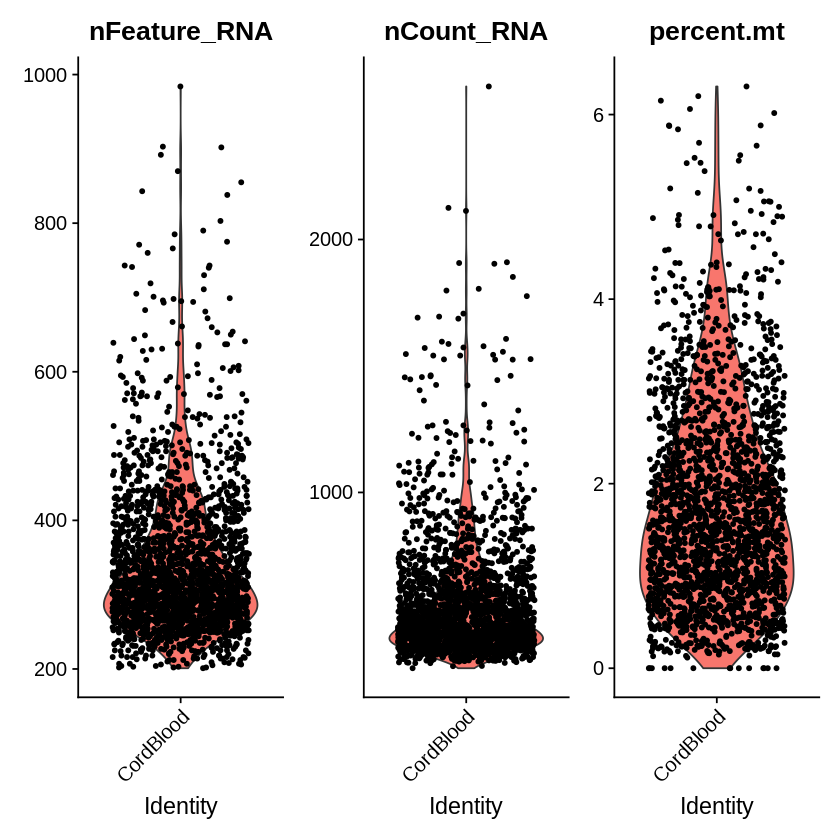

In [6]:
# Visualize QC metrics as a violin plot
VlnPlot(dataobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)#+scale_color_npg() 不起作用

## 下面要调

In [7]:
# Pre-processing
min.cells = 3
min.features = 0
nFeature_RNA_range = c(20, 3000)
percent.mt.thre = 20

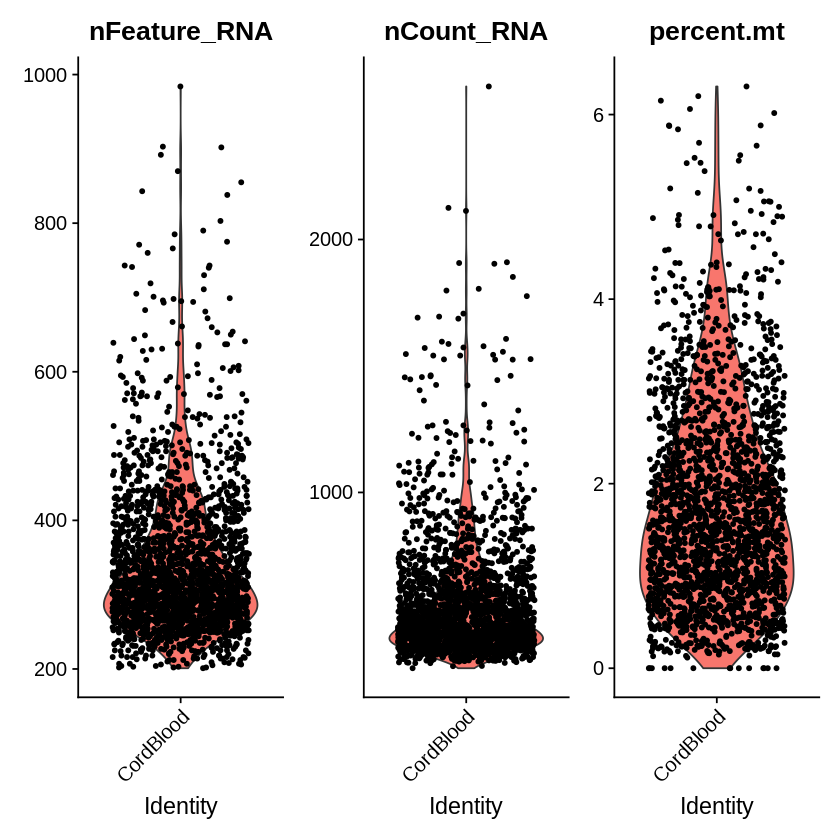

In [8]:
# QC
#dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)
# Visualize QC metrics as a violin plot
VlnPlot(dataobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)#+scale_color_npg() 不起作用

In [9]:
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -3.0314”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  7.1336e-16”
Centering and scaling data matrix



In [10]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj) 
dev.off()


PC_ 1 
Positive:  HBA1, HBA2, HBG2, HBB, PRDX2, AHSP, GYPA, HBM, CA2, GYPB 
	   HEMGN, ALAS2, HMBS, SLC4A1, MYL4, CA1, HBG1, TUBA1B, BLVRB, UROD 
	   TFRC, KIAA0101, PTTG1, RHCE, SLC25A37, MGST3, RHAG, CCNB1, SELENBP1, KLF1 
Negative:  S100A9, S100A8, S100A12, DUSP1, LTF, SAT1, CST3, LCN2, FCN1, CAMP 
	   PGLYRP1, PLBD1, TYROBP, S100A6, IFITM2, FOS, LGALS1, G0S2, FTL, RETN 
	   CRISP3, HP, IFITM3, CDA, HLA-DRB1, S100A4, FCER1G, ALOX5AP, CHI3L1, SH3BGRL3 
PC_ 2 
Positive:  HBA2, HBA1, HBB, HBG2, AHSP, HBM, GYPA, ALAS2, HBG1, PRDX2 
	   SLC4A1, GYPB, HEMGN, CA1, CA2, FTH1, SLC25A37, BLVRB, MYL4, HMBS 
	   RHAG, SELENBP1, S100A12, PGLYRP1, FECH, S100A9, S100A8, HBD, CST3, LTF 
Negative:  MPO, ELANE, AZU1, PRTN3, CTSG, SRGN, DEFA4, RNASE2, MS4A3, RNASE3 
	   DEFA3, NUCB2, CST7, P4HB, PRSS57, DEFA8P, CLEC11A, CALR, MT-CO3, SLPI 
	   GAPDH, MT-ND1, STMN1, PDIA6, HSP90B1, CEACAM6, CANX, MGST1, AIG1, H2AFZ 
PC_ 3 
Positive:  CD74, HLA-DRB1, HLA-DRA, HLA-DPA1, FTH1, TMSB10, HLA-DPB1, FTL, CST3,

png 
  2

Warning message in ElbowPlot(dataobj, 100):
“The object only has information for 50 reductions”


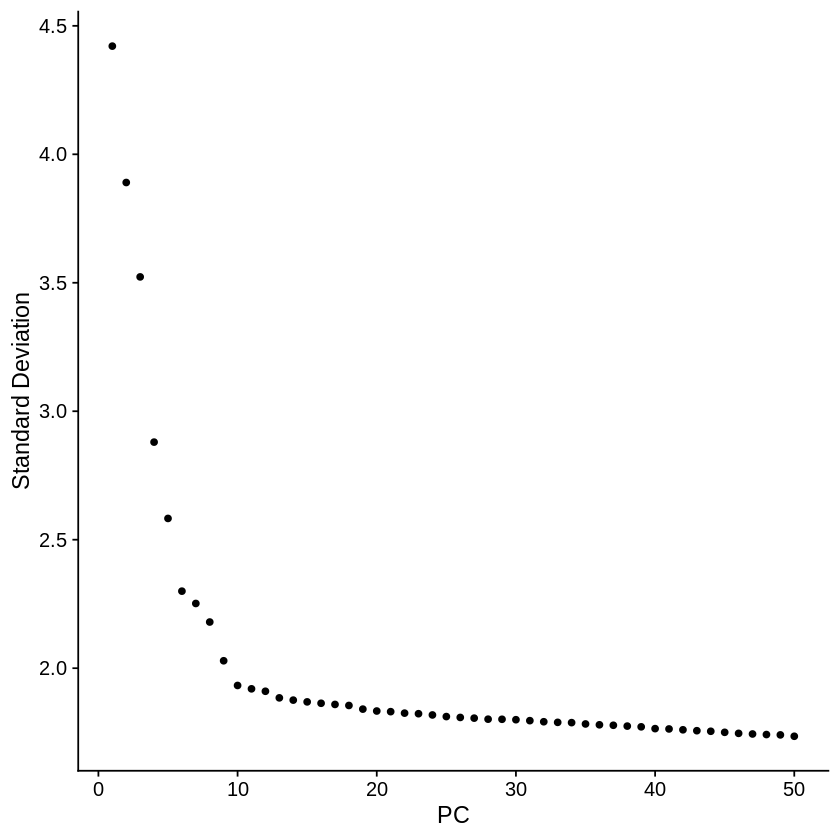

In [11]:
ElbowPlot(dataobj,100) 

## 下面要调

In [12]:
pcDim = 30
# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)
dataobj <- FindClusters(dataobj, resolution = 0.8, n.start = 10)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2150
Number of edges: 121216

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7314
Number of communities: 7
Elapsed time: 0 seconds


In [13]:
# Visulize the clustering result
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:43:20 UMAP embedding parameters a = 0.9922 b = 1.112

09:43:20 Read 2150 rows and found 30 numeric columns

09:43:20 Using Annoy for neighbor search, n_neighbors = 30

09:43:20 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

09:43:21 Writing NN index file to temp file /tmp/RtmpeKDH9T/file5c305367f575

09:43:21 Searching Annoy index using 1 thread, search_k = 3000

09:43:21 Annoy recall = 100%

09:43:22 Commencing smooth kNN distance calibration using 1 thread

09:43:22 Initializing fr

In [14]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)+NoLegend()
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap, width = 8, height = 5)

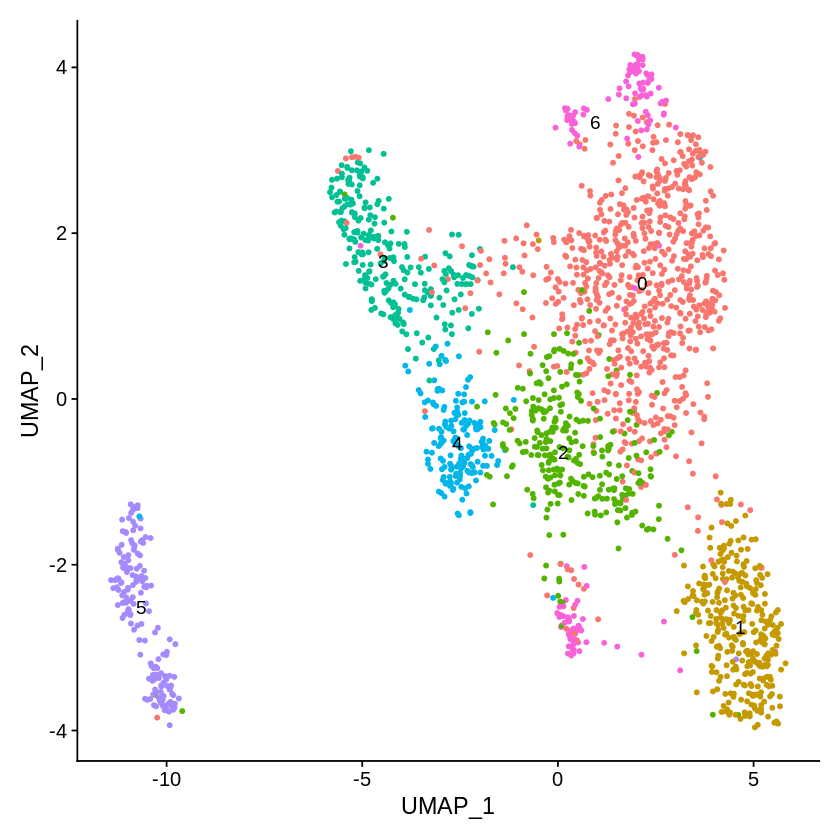

In [15]:
p_umap

In [21]:
new.cluster.ids<-c('Blood-Connective tissue-Monocyte-FCN1','Blood-Connective tissue-Neutrophil-CD24','Blood-Connective tissue-T cell-GNLY','Blood-Connective tissue-Neutrophil-MPO ELANE','Blood-Connective tissue-Hemopoietic stem cell-GAS5 CD99','Blood-Connective tissue-Erythrocyte-HBB HBA1','Blood-Connective tissue-Conventional dendritic cell-CD74 HLA-DRA')

In [22]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
hcad.label = Idents(dataobj)
dataobj <- AddMetaData(dataobj, metadata = hcad.label,col.name = 'hcad.label')

In [34]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj22.rds"))

In [23]:
target_rds = paste0('/stor/public/hcad/',datasetName,'/',datasetName,'.seuratobj.dbupload_v1.rds')

In [24]:
saveRDS(dataobj, file = target_rds)

In [18]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1)+NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height =5)

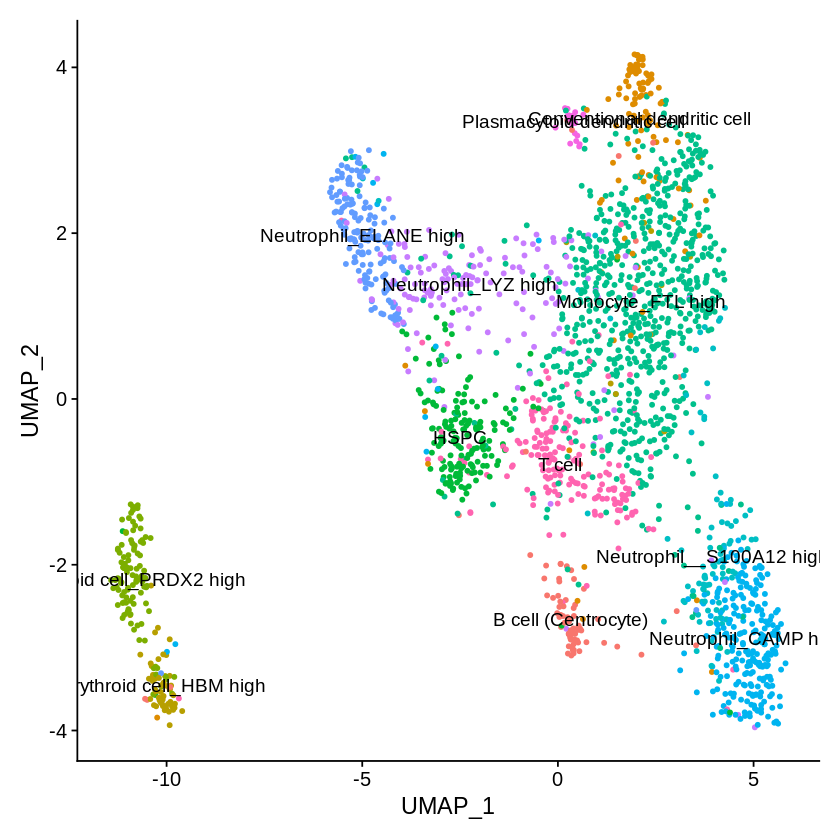

In [19]:
p_umap2

In [20]:

# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

